In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

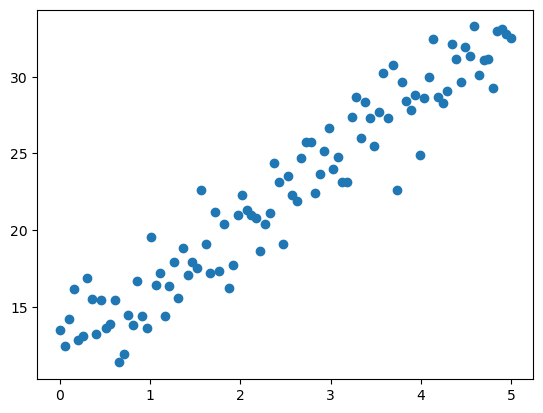

In [2]:
np.random.seed(42)
x = np.linspace(0, 5, 100)
y = 12.5 + 4.1*x + np.random.normal(size = 100, scale = 2)
plt.scatter(x, y)

In [3]:
X = np.concatenate((np.ones((len(x), 1)), x.reshape(-1, 1)), axis = 1)
X = pd.DataFrame(X, columns = ['bias', 'x'])

X.head()

,bias,x
0,1.0,0.000000
1,1.0,0.050505
2,1.0,0.101010
3,1.0,0.151515
4,1.0,0.202020


In [5]:
def mse_grad(theta, x, y):
    x0 = x.iloc[:, 0]
    x1 = x.iloc[:, 1]
    dt0 = np.mean(-2*(y - theta[0]*x0 - theta[1]*x1)*x0)
    dt1 = np.mean(-2*(y - theta[0]*x0 - theta[1]*x1)*x1)
    return np.array([dt0, dt1])

In [6]:
mse_grad(np.array([0, 0]), X, y)

array([ -45.08461393, -130.37451799])

In [9]:
theta = np.array([0, 0])
thetas = []
lr = 0.01
for i in range(1000):
    thetas.append(theta)
    theta = theta - lr*mse_grad(theta, X, y)

thetas[-1]

array([12.059837  ,  4.18419733])

In [10]:
lr = LinearRegression(fit_intercept=False).fit(X, y)
lr.coef_

array([12.15437429,  4.15517307])